# 分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()

In [3]:
# 特徴量（入力値）
# sepal: がく, petal: 花びら
column_names = dataset.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
x = dataset.data

In [5]:
# 種類（目標値）
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
t = dataset.target

In [7]:
# 全部で何種類あるかはunique関数で確認できる
np.unique(t)

array([0, 1, 2])

In [8]:
x.shape

(150, 4)

In [9]:
t.shape

(150,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [14]:
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# 正解率（アーキュレイシー）
# クラス分類の損失関数として使われる式を交差エントロピーという
print(f'train score: {model.score(x_train, t_train)}')
print(f'train score: {model.score(x_test, t_test)}')

train score: 1.0
train score: 0.9777777777777777


In [16]:
model.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## 決定木の特徴

### メリット

- 解釈・説明が容易（機械学習はブラックボックス化しがち）
  - ビジネスの現場ではどの変数が重要かを知りたいことが多い
- 前処理が少ない

### デメリット

- 過学習になりやすい（そのためハイパーパラメータが重要）

### ハイパーパラメータ

- max_depth（木構造の深さの上限）
  - 深くなるほど過学習に陥りやすい
- min_samples_split（木構造の分岐先のサンプル数）
  - 細かく分けすぎると過学習になる

### graphvizのインストール
```bash
apt install graphviz
python -m pip install graphviz
```

In [17]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz

In [18]:
dot_data = export_graphviz(model)

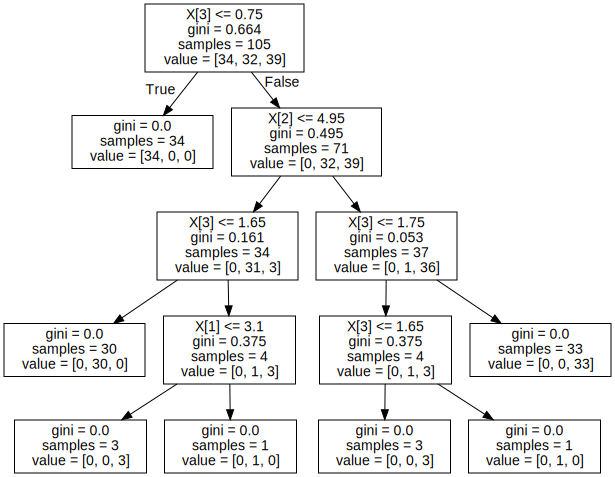

In [19]:
graph_tree = graphviz.Source(dot_data)
graph_tree

gini: ジニ係数は、分布の均等度合いを示す指標で、0~1の値を取り、1に血がづくほど格差が大きい

samples: 枝に含まれるサンプル数

value: 分類ごとのサンプル数

In [20]:
# どの特徴量が重要であるかを調べる（決定木で最初にくる質問ほど重要）
feature_importance = model.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [21]:
y = column_names
width = feature_importance

<BarContainer object of 4 artists>

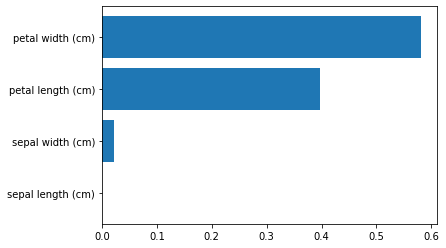

In [22]:
plt.barh(y=y, width=width)

petal widthが重要で、sepal lengthは分類に不要であることがわかる。

## サポートベクトルマシン（SVM）

与えられたデータを線形分離する分類法。
境界線に最も近いサンプルとの距離（マージン）が最大となるように境界線を引く。

カーネル関数が出てきて、特徴空間上で線形分離を行う手法（カーネルトリック）が開発された。


In [23]:
from sklearn.svm import SVC

In [24]:
model = SVC()
model.fit(x_train, t_train)

SVC()

In [25]:
print(f'train score: {model.score(x_train, t_train)}')
print(f'train score: {model.score(x_test, t_test)}')

train score: 0.9714285714285714
train score: 0.9777777777777777


SVMは本来特徴量の標準化が必要だが、今回はすべてcmのスケールなので標準化しなくても良い結果が出ている。
距離を計算するアルゴリズムでは、一般的に標準化したほうが良い結果になるらしい。

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [30]:
print(f'標準化前の平均値:{round(x_train.mean(), 3)}')
print(f'標準化後の平均値:{round(x_train_std.mean(), 3)}')
print(f'標準化前の標準偏差:{round(x_train.std(), 3)}')
print(f'標準化後の標準偏差:{round(x_train_std.std(), 3)}')

標準化前の平均値:3.499
標準化後の平均値:0.0
標準化前の標準偏差:1.999
標準化後の標準偏差:1.0


In [31]:
model_std = SVC()

In [32]:
model_std.fit(x_train_std, t_train)
print(f'train score: {model.score(x_train, t_train)}')
print(f'train score: {model.score(x_test, t_test)}')
print('===================')
print(f'train score: {model_std.score(x_train_std, t_train)}')
print(f'train score: {model_std.score(x_test_std, t_test)}')

train score: 0.9714285714285714
train score: 0.9777777777777777
train score: 0.9714285714285714
train score: 0.9777777777777777


### SVMのハイパーパラメータ

C: コストパラメータ（ペナルティの大きさ）、デフォルト1.0

gamma: モデルの複雑さ、値が大きくなるほどモデルが複雑になり、過学習を起こしがち

In [33]:
model_std = SVC(C=1.0, gamma=0.01)
model_std.fit(x_train_std, t_train)
print(f'train score: {model.score(x_train, t_train)}')
print(f'train score: {model.score(x_test, t_test)}')
print('===================')
print(f'train score: {model_std.score(x_train_std, t_train)}')
print(f'train score: {model_std.score(x_test_std, t_test)}')

train score: 0.9714285714285714
train score: 0.9777777777777777
train score: 0.9047619047619048
train score: 0.8888888888888888


### 分類の評価指標

- Accuracy（正解率）
- Precision（適合率）
- Recall（再現率）
- F1score（F値）

Accuracyだけを評価指標にすると問題が生じることがある。
たとえば、2クラス分類でデータセットが100件あるうちの99件がA、1件がBのとき、すべてをAと判定すればAccuracyは0.99と高い値になる。

#### 混同行列（Confusion Matrix）

|       |  がん（診断結果） | 健康（診断結果） |
|:------|---------:|---------:|
| がん（実際の状態） |        10(TP) |        50(FN) |
| 健康（実際の状態） |        5(FP) |        195(TN) |

正例をがん、負例を健康とする。
- True/False: 予測が正しいか否か。
- Positive/Negative: 予測値を正例としたか負例としたか。

#### Accuracy

正解率は、混同行列の斜めの線を見る。

Accuracay = (TP + TN) / (TP + FN + FP + TN) = 79%

#### Precision

適合率は、混同行列を縦方向に見る。

Precision = TP / (TP + FP) = 67%

再現率は、混同行列を横方向に見る。
- 正例の見落としを防ぎたいときに重視
- 誤診（偽陽性）は許容する

#### Recall

Recall = TP / (TP + FN) = 16%

#### F1score

F値は、適合率と再現率のバランスを取るために調和平均で計算された指標。

適合率と再現率は、どちらかを上げれば、どちらかが下がる性質があるため。

F1score = (2 * Recall * Precision) / (Recall + Precision)

In [34]:
# pythonで混同行列を出力する例
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 1, 1, 1, 0, 0, 0, 0, 1]  # 正解ラベル
y_pred = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1]  # 予測ラベル
labels = [1, 0]  # ラベルの順序を指定
cm = confusion_matrix(y_true, y_pred, labels=labels)  # 混同行列の取得&ラベル順序指定

# 綺麗に出力
columns_labels = ["pred_" + str(l) for l in labels]
index_labels = ["act_" + str(l) for l in labels]
cm = pd.DataFrame(cm,
                  columns=columns_labels, index=index_labels)

print(cm.to_markdown())

|       |   pred_1 |   pred_0 |
|:------|---------:|---------:|
| act_1 |        3 |        2 |
| act_0 |        1 |        4 |
